In [1]:
import os
os.chdir("C:\\Users\\vikas\\Desktop\\PythonML")
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('save_homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

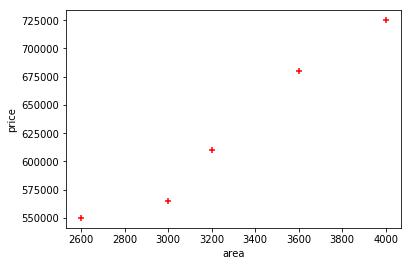

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.show()

In [7]:
area = df[['area']]
area

area
0  2600
1  3000
2  3200
3  3600
4  4000

In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [9]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
reg.predict([[3000]])

array([587979.45205479])

In [11]:
reg.coef_

array([135.78767123])

In [12]:
reg.intercept_

180616.43835616432

In [13]:
#Y = m * X + b (m is coefficient and b is intercept)
5000*135.78767123 + 180616.43835616432

859554.7945061643

In [14]:
#Generate CSV file with list of home price predictions

area_df = pd.read_csv("areas.csv")
area_df.head(3)

area
0  1000
1  1500
2  2300

In [15]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
area_df['prices']=p
area_df

area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06

In [17]:
area_df.to_csv("prediction.csv")

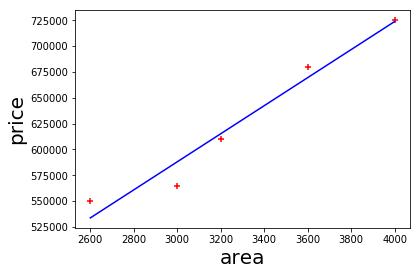

In [18]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(area),color='blue')